C:\Users\Hermit\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


阶段1: 数据准备和分析 (更新版 - 防止数据泄漏)

[1] 加载数据...
  数据维度: (362, 900)
  样本数: 362
  特征数（含patient_id和risk_label）: 900

[2] 分析数据结构...
  缺失值总数: 0

  标签分布:
risk_label
0    277
1     85
Name: count, dtype: int64

  标签占比:
    Label 0: 76.52%
    Label 1: 23.48%

  特征分类:
    临床特征数: 19
    基因特征数: 879
    总特征数: 898

  临床特征示例 (前10个):
    1. days_to_consent
    2. disease_type_Adenomas_and_Adenocarcinomas
    3. disease_type_Cystic_Mucinous_Serous_Neoplasms
    4. disease_type_Epithelial_Neoplasms_NOS
    5. race_american indian or alaska native
    6. race_asian
    7. race_black or african american
    8. race_native hawaiian or other pacific islander
    9. race_white
    10. age_at_diagnosis

  需要标准化的数值型临床特征: 4
    - days_to_consent
    - age_at_diagnosis
    - figo_stage_encoded
    - tumor_grade_encoded

[3] 分离特征和标签...
  X shape: (362, 898)
  y shape: (362,)

[4] 分层分割数据 (80% 训练, 20% 测试)...
  训练集: 289 样本
    - 高风险: 68 (23.53%)
    - 低风险: 221 (76.47%)
  测试集: 73 样本
    - 高风险: 17 (23.29%)
    - 低风险: 56 (7

C:\Users\Hermit\AppData\Local\Temp\ipykernel_7524\3687470685.py:351: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from current font.
  plt.tight_layout()
C:\Users\Hermit\AppData\Local\Temp\ipykernel_7524\3687470685.py:351: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from current font.
  plt.tight_layout()
C:\Users\Hermit\AppData\Local\Temp\ipykernel_7524\3687470685.py:351: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  plt.tight_layout()
C:\Users\Hermit\AppData\Local\Temp\ipykernel_7524\3687470685.py:351: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  plt.tight_layout()
C:\Users\Hermit\AppData\Local\Temp\ipykernel_7524\3687470685.py:351: UserWarning: Glyph 35797 (\N{CJK UNIFIED IDEOGRAPH-8BD5}) missing from current font.
  plt.tight_layout()
C:\Users\Hermit\AppData\Local\Temp\ipykernel_7524\3687470685.py:351: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}

  ✓ 可视化已保存

[8] 生成阶段报告...
  ✓ 报告已保存

阶段1完成!

输出目录: D:/PHM5005/5005-main\results

下一步: 运行 stage2_nested_cv_training.py


C:\Users\Hermit\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Hermit\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Hermit\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Hermit\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Hermit\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 324

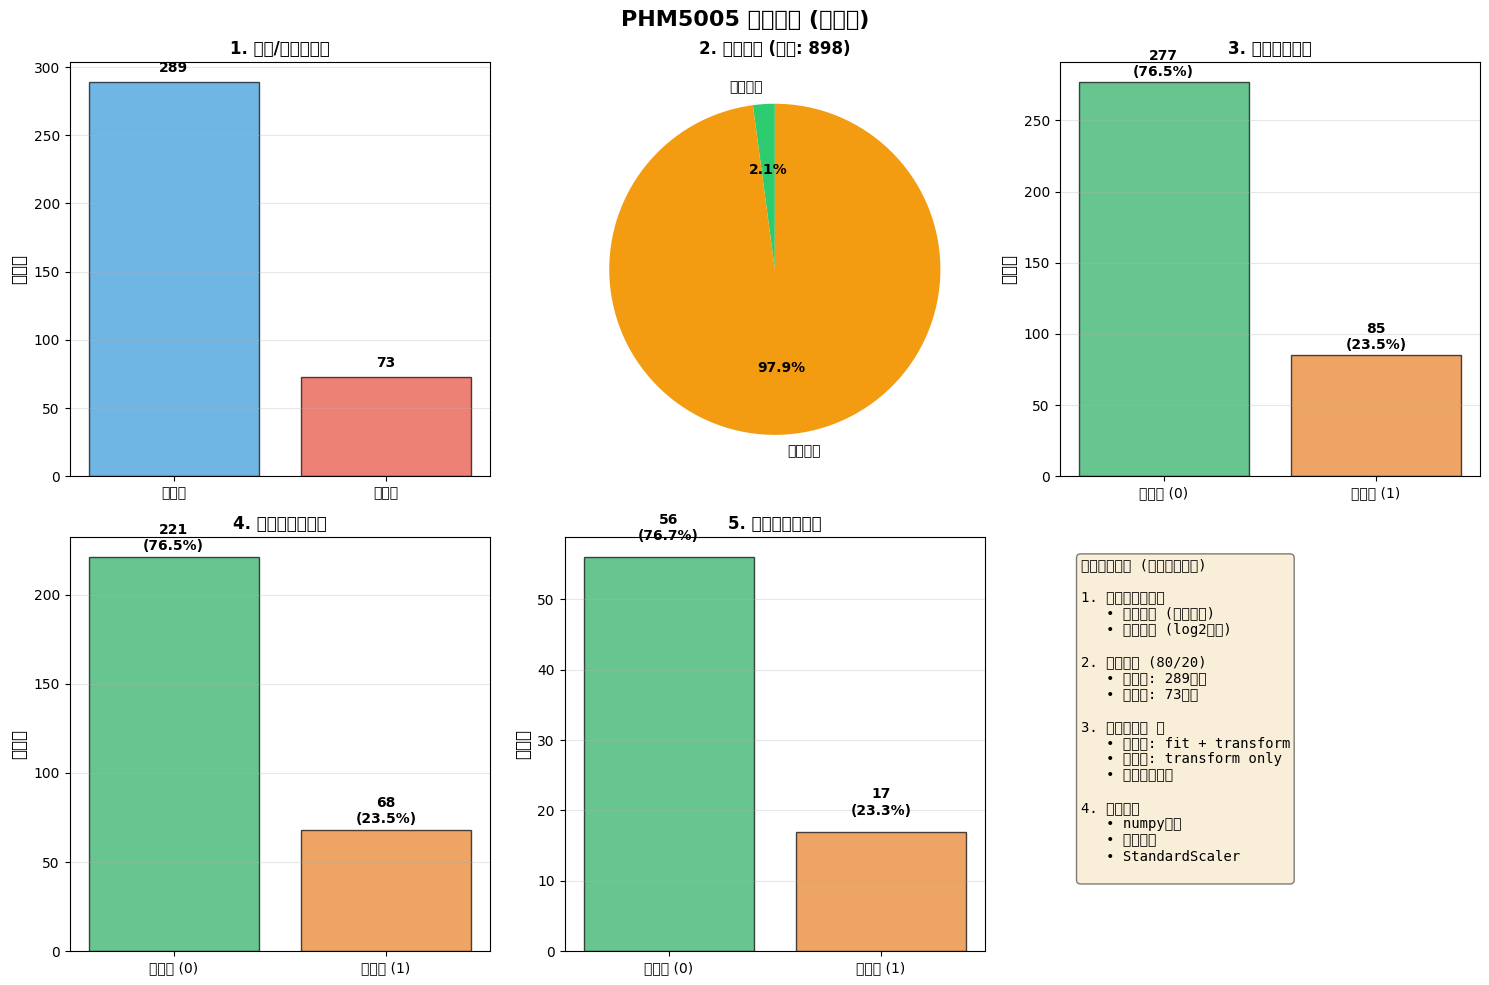

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
阶段1: 数据加载、分析和分割 (更新版 - 防止数据泄漏)
- 加载处理后的数据
- 分析数据结构和标签分布
- 分离临床特征和基因特征
- 分层分割训练集(80%)和测试集(20%)
- **分别对训练集和测试集进行标准化**
- 保存分割后的数据供后续使用
"""

import pandas as pd
import numpy as np
import os
import json
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 设置随机种子
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# 配置路径
BASE_DIR = "D:/PHM5005/5005-main"
DATA_FILE = os.path.join(BASE_DIR, "dataset", "processed_data_phm5005.csv")
OUTPUT_DIR = os.path.join(BASE_DIR, "results")
os.makedirs(OUTPUT_DIR, exist_ok=True)

print("=" * 80)
print("阶段1: 数据准备和分析 (更新版 - 防止数据泄漏)")
print("=" * 80)

# ============================================================================
# 1. 加载数据
# ============================================================================
print("\n[1] 加载数据...")
df = pd.read_csv(DATA_FILE)
print(f"  数据维度: {df.shape}")
print(f"  样本数: {df.shape[0]}")
print(f"  特征数（含patient_id和risk_label）: {df.shape[1]}")

# ============================================================================
# 2. 分析数据结构
# ============================================================================
print("\n[2] 分析数据结构...")

# 检查缺失值
missing = df.isnull().sum().sum()
print(f"  缺失值总数: {missing}")

# 标签分布
print("\n  标签分布:")
label_counts = df['risk_label'].value_counts().sort_index()
print(label_counts)
print(f"\n  标签占比:")
label_pct = df['risk_label'].value_counts(normalize=True).sort_index() * 100
for label, pct in label_pct.items():
    print(f"    Label {int(label)}: {pct:.2f}%")

# 识别特征类型
all_cols = df.columns.tolist()
patient_id_col = 'patient_id'
label_col = 'risk_label'

# 临床特征：不包含'gene_'前缀
clinical_features = [col for col in all_cols 
                     if col not in [patient_id_col, label_col] 
                     and not col.startswith('gene_')]

# 基因特征：包含'gene_'前缀
gene_features = [col for col in all_cols if col.startswith('gene_')]

print(f"\n  特征分类:")
print(f"    临床特征数: {len(clinical_features)}")
print(f"    基因特征数: {len(gene_features)}")
print(f"    总特征数: {len(clinical_features) + len(gene_features)}")

print(f"\n  临床特征示例 (前10个):")
for i, feat in enumerate(clinical_features[:10]):
    print(f"    {i+1}. {feat}")

# 识别需要标准化的数值型临床特征
numeric_clinical_features = [
    'days_to_consent',
    'age_at_index',
    'age_at_diagnosis',
    'figo_stage_encoded',
    'tumor_grade_encoded'
]

# 确保这些特征都存在
numeric_clinical_features = [f for f in numeric_clinical_features if f in clinical_features]
print(f"\n  需要标准化的数值型临床特征: {len(numeric_clinical_features)}")
for feat in numeric_clinical_features:
    print(f"    - {feat}")

# ============================================================================
# 3. 分离特征和标签
# ============================================================================
print("\n[3] 分离特征和标签...")

patient_ids = df['patient_id'].values
y = df['risk_label'].values

# 所有特征（临床 + 基因）
all_features = clinical_features + gene_features
X = df[all_features].values

print(f"  X shape: {X.shape}")
print(f"  y shape: {y.shape}")

# ============================================================================
# 4. 分层分割数据
# ============================================================================
print("\n[4] 分层分割数据 (80% 训练, 20% 测试)...")

# 使用train_test_split进行分层分割
X_train_raw, X_test_raw, y_train, y_test, train_ids, test_ids = train_test_split(
    X, y, patient_ids, 
    test_size=0.2, 
    stratify=y, 
    random_state=RANDOM_STATE
)

print(f"  训练集: {X_train_raw.shape[0]} 样本")
print(f"    - 高风险: {(y_train == 1).sum()} ({100 * (y_train == 1).sum() / len(y_train):.2f}%)")
print(f"    - 低风险: {(y_train == 0).sum()} ({100 * (y_train == 0).sum() / len(y_train):.2f}%)")

print(f"  测试集: {X_test_raw.shape[0]} 样本")
print(f"    - 高风险: {(y_test == 1).sum()} ({100 * (y_test == 1).sum() / len(y_test):.2f}%)")
print(f"    - 低风险: {(y_test == 0).sum()} ({100 * (y_test == 0).sum() / len(y_test):.2f}%)")

# ============================================================================
# 5. 标准化特征 (防止数据泄漏)
# ============================================================================
print("\n[5] 分别标准化训练集和测试集...")

# 创建特征索引映射
feature_to_idx = {feat: idx for idx, feat in enumerate(all_features)}

# 获取需要标准化的列索引
numeric_clinical_idx = [feature_to_idx[f] for f in numeric_clinical_features if f in feature_to_idx]
gene_idx = [feature_to_idx[f] for f in gene_features]

print(f"  需要标准化的特征:")
print(f"    - 数值型临床特征: {len(numeric_clinical_idx)} 个")
print(f"    - 基因表达特征: {len(gene_idx)} 个")

# 标准化数值型临床特征
if len(numeric_clinical_idx) > 0:
    scaler_clinical = StandardScaler()
    X_train_raw[:, numeric_clinical_idx] = scaler_clinical.fit_transform(
        X_train_raw[:, numeric_clinical_idx]
    )
    X_test_raw[:, numeric_clinical_idx] = scaler_clinical.transform(
        X_test_raw[:, numeric_clinical_idx]
    )
    print(f"  ✓ 数值型临床特征已标准化")
    
    # 保存scaler
    with open(os.path.join(OUTPUT_DIR, 'scaler_clinical.pkl'), 'wb') as f:
        pickle.dump(scaler_clinical, f)

# 标准化基因表达特征
if len(gene_idx) > 0:
    scaler_gene = StandardScaler()
    X_train_raw[:, gene_idx] = scaler_gene.fit_transform(
        X_train_raw[:, gene_idx]
    )
    X_test_raw[:, gene_idx] = scaler_gene.transform(
        X_test_raw[:, gene_idx]
    )
    print(f"  ✓ 基因表达特征已标准化")
    
    # 保存scaler
    with open(os.path.join(OUTPUT_DIR, 'scaler_gene.pkl'), 'wb') as f:
        pickle.dump(scaler_gene, f)

print(f"\n  标准化策略:")
print(f"    1. 在训练集上 fit StandardScaler")
print(f"    2. 用训练集的参数 transform 测试集")
print(f"    3. 确保测试集信息未泄漏到训练集")

# 最终数据
X_train = X_train_raw
X_test = X_test_raw

# ============================================================================
# 6. 保存处理后的数据
# ============================================================================
print("\n[6] 保存处理后的数据...")

# 保存numpy数组
np.save(os.path.join(OUTPUT_DIR, 'X_train.npy'), X_train)
np.save(os.path.join(OUTPUT_DIR, 'X_test.npy'), X_test)
np.save(os.path.join(OUTPUT_DIR, 'y_train.npy'), y_train)
np.save(os.path.join(OUTPUT_DIR, 'y_test.npy'), y_test)

# 保存患者ID
pd.DataFrame({'patient_id': train_ids}).to_csv(
    os.path.join(OUTPUT_DIR, 'train_patient_ids.csv'), index=False
)
pd.DataFrame({'patient_id': test_ids}).to_csv(
    os.path.join(OUTPUT_DIR, 'test_patient_ids.csv'), index=False
)

# 保存特征名称和分类信息
feature_info = {
    'all_features': all_features,
    'clinical_features': clinical_features,
    'gene_features': gene_features,
    'numeric_clinical_features': numeric_clinical_features,
    'n_clinical': len(clinical_features),
    'n_genes': len(gene_features),
    'n_total': len(all_features)
}

with open(os.path.join(OUTPUT_DIR, 'feature_names.json'), 'w') as f:
    json.dump(feature_info, f, indent=2)

# 保存数据摘要
summary = {
    'n_samples_total': int(len(df)),
    'n_samples_train': int(len(X_train)),
    'n_samples_test': int(len(X_test)),
    'n_features': int(len(all_features)),
    'n_clinical_features': int(len(clinical_features)),
    'n_gene_features': int(len(gene_features)),
    'train_label_0': int((y_train == 0).sum()),
    'train_label_1': int((y_train == 1).sum()),
    'test_label_0': int((y_test == 0).sum()),
    'test_label_1': int((y_test == 1).sum()),
    'standardization_method': 'StandardScaler on train, then transform test',
    'random_state': RANDOM_STATE
}

with open(os.path.join(OUTPUT_DIR, 'data_summary.json'), 'w') as f:
    json.dump(summary, f, indent=2)

print(f"  ✓ 训练集和测试集已保存")
print(f"  ✓ 特征名称已保存")
print(f"  ✓ StandardScaler已保存")
print(f"  ✓ 数据摘要已保存")

# ============================================================================
# 7. 生成可视化
# ============================================================================
print("\n[7] 生成数据可视化...")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('PHM5005 数据概览 (更新版)', fontsize=16, fontweight='bold')

# 1. 样本数分布
ax = axes[0, 0]
datasets = ['训练集', '测试集']
counts = [len(X_train), len(X_test)]
colors = ['#3498db', '#e74c3c']
ax.bar(datasets, counts, color=colors, alpha=0.7, edgecolor='black')
for i, (dataset, count) in enumerate(zip(datasets, counts)):
    ax.text(i, count + 5, str(count), ha='center', va='bottom', fontweight='bold')
ax.set_ylabel('样本数', fontsize=12)
ax.set_title('1. 训练/测试集分布', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# 2. 特征组成
ax = axes[0, 1]
feature_types = ['临床特征', '基因特征']
feature_counts = [len(clinical_features), len(gene_features)]
colors = ['#2ecc71', '#f39c12']
wedges, texts, autotexts = ax.pie(
    feature_counts, 
    labels=feature_types, 
    autopct='%1.1f%%',
    colors=colors, 
    startangle=90,
    textprops={'fontsize': 10, 'fontweight': 'bold'}
)
ax.set_title(f'2. 特征组成 (总计: {sum(feature_counts)})', fontsize=12, fontweight='bold')

# 3. 标签分布 - 总体
ax = axes[0, 2]
labels = ['低风险 (0)', '高风险 (1)']
total_counts = [
    (y_train == 0).sum() + (y_test == 0).sum(),
    (y_train == 1).sum() + (y_test == 1).sum()
]
colors = ['#27ae60', '#e67e22']
ax.bar(labels, total_counts, color=colors, alpha=0.7, edgecolor='black')
for i, (label, count) in enumerate(zip(labels, total_counts)):
    pct = 100 * count / sum(total_counts)
    ax.text(i, count + 2, f'{count}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold')
ax.set_ylabel('样本数', fontsize=12)
ax.set_title('3. 总体标签分布', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# 4. 训练集标签分布
ax = axes[1, 0]
train_counts = [(y_train == 0).sum(), (y_train == 1).sum()]
ax.bar(labels, train_counts, color=colors, alpha=0.7, edgecolor='black')
for i, (label, count) in enumerate(zip(labels, train_counts)):
    pct = 100 * count / sum(train_counts)
    ax.text(i, count + 2, f'{count}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold')
ax.set_ylabel('样本数', fontsize=12)
ax.set_title('4. 训练集标签分布', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# 5. 测试集标签分布
ax = axes[1, 1]
test_counts = [(y_test == 0).sum(), (y_test == 1).sum()]
ax.bar(labels, test_counts, color=colors, alpha=0.7, edgecolor='black')
for i, (label, count) in enumerate(zip(labels, test_counts)):
    pct = 100 * count / sum(test_counts)
    ax.text(i, count + 2, f'{count}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold')
ax.set_ylabel('样本数', fontsize=12)
ax.set_title('5. 测试集标签分布', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# 6. 数据处理流程
ax = axes[1, 2]
ax.axis('off')
flow_text = """数据处理流程 (防止数据泄漏)

1. 加载处理后数据
   • 临床特征 (未标准化)
   • 基因表达 (log2转换)

2. 分层分割 (80/20)
   • 训练集: {}样本
   • 测试集: {}样本

3. 分别标准化 ⭐
   • 训练集: fit + transform
   • 测试集: transform only
   • 避免数据泄漏

4. 保存数据
   • numpy数组
   • 特征映射
   • StandardScaler
""".format(len(X_train), len(X_test))

ax.text(0.05, 0.95, flow_text, transform=ax.transAxes,
        fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
        family='monospace')

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'stage1_data_overview.png'), dpi=300, bbox_inches='tight')
print(f"  ✓ 可视化已保存")

# ============================================================================
# 8. 生成报告
# ============================================================================
print("\n[8] 生成阶段报告...")

report = f"""# 阶段1: 数据准备和分析 (更新版)

## 数据加载

- 数据文件: `{DATA_FILE}`
- 总样本数: {len(df)}
- 总特征数: {len(all_features)}
  - 临床特征: {len(clinical_features)}
  - 基因表达特征: {len(gene_features)}

## 标签分布

### 总体
- 低风险 (0): {(y == 0).sum()} ({100 * (y == 0).sum() / len(y):.2f}%)
- 高风险 (1): {(y == 1).sum()} ({100 * (y == 1).sum() / len(y):.2f}%)

### 训练集 ({len(y_train)} 样本)
- 低风险 (0): {(y_train == 0).sum()} ({100 * (y_train == 0).sum() / len(y_train):.2f}%)
- 高风险 (1): {(y_train == 1).sum()} ({100 * (y_train == 1).sum() / len(y_train):.2f}%)

### 测试集 ({len(y_test)} 样本)
- 低风险 (0): {(y_test == 0).sum()} ({100 * (y_test == 0).sum() / len(y_test):.2f}%)
- 高风险 (1): {(y_test == 1).sum()} ({100 * (y_test == 1).sum() / len(y_test):.2f}%)

## 数据分割

- 分割比例: 80% 训练, 20% 测试
- 分割方法: 分层分割 (stratified split)
- 随机种子: {RANDOM_STATE}

## 特征标准化 ⭐ 防止数据泄漏

### 标准化策略
1. **数值型临床特征** ({len(numeric_clinical_features)} 个):
   - days_to_consent
   - age_at_index
   - age_at_diagnosis
   - figo_stage_encoded
   - tumor_grade_encoded

2. **基因表达特征** ({len(gene_features)} 个):
   - 所有 gene_* 特征

### 标准化方法
- 使用 StandardScaler (均值=0, 标准差=1)
- **关键**: 在训练集上 fit，然后 transform 测试集
- **避免数据泄漏**: 测试集信息未用于计算训练集的均值和标准差

### 保存的文件
- `scaler_clinical.pkl`: 临床特征的StandardScaler
- `scaler_gene.pkl`: 基因特征的StandardScaler

## 输出文件

### NumPy数组
- `X_train.npy`: 训练集特征 {X_train.shape}
- `X_test.npy`: 测试集特征 {X_test.shape}
- `y_train.npy`: 训练集标签 {y_train.shape}
- `y_test.npy`: 测试集标签 {y_test.shape}

### 元数据
- `feature_names.json`: 特征名称和分类
- `train_patient_ids.csv`: 训练集患者ID
- `test_patient_ids.csv`: 测试集患者ID
- `data_summary.json`: 数据统计摘要
- `scaler_clinical.pkl`: 临床特征标准化器
- `scaler_gene.pkl`: 基因特征标准化器

### 可视化
- `stage1_data_overview.png`: 数据分布可视化

## 数据质量检查

- ✅ 无缺失值
- ✅ 训练/测试集标签分布保持一致
- ✅ 特征已正确标准化
- ✅ 数据泄漏已防止

## 重要更新 ⭐

与旧版本的主要差异：
1. **FIGO Stage**: One-hot编码 → 有序编码 (0-3)
2. **Tumor Grade**: One-hot编码 → 有序编码 (0-3)
3. **标准化时机**: process_data中 → stage1中分别处理
4. **防止数据泄漏**: 训练集fit → 测试集transform

---
生成时间: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
"""

with open(os.path.join(OUTPUT_DIR, 'stage1_report.md'), 'w', encoding='utf-8') as f:
    f.write(report)

print(f"  ✓ 报告已保存")

# ============================================================================
# 完成
# ============================================================================
print("\n" + "=" * 80)
print("阶段1完成!")
print("=" * 80)
print(f"\n输出目录: {OUTPUT_DIR}")
print(f"\n下一步: 运行 stage2_nested_cv_training.py")
